In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from util import *
from algorithms import *
import scipy
from tqdm import tqdm
import ot

In [12]:
times_MYULA = np.load('results/image_ex/deconv_kernelsize_5/MYULA/barbara/reg_par_20_data_par_10000.0_ld_0.0001_tau_1e-05_computation_times.npy')
print(np.sum(times_MYULA)/np.sum(times_MYULA>0))

43.42502272748947


In [13]:
times_MYULA = np.load('results/image_ex/deconv_kernelsize_5/grad_subgrad/barbara/reg_par_20_data_par_10000.0_tau_1e-05_computation_times.npy')
print(np.sum(times_MYULA)/np.sum(times_MYULA>0))

0.9146965521176657


In [15]:
times_MYULA = np.load('results/2d_ex/grad_subgrad/l2/reg_par_5.0_data_par_1.0_tau_1e-04_computation_times.npy')
print(np.sum(times_MYULA)/np.sum(times_MYULA>0))

FileNotFoundError: [Errno 2] No such file or directory: 'results/2d_ex/grad_subgrad/l2/reg_par_5.0_data_par_1.0_tau_1e-04_computation_times.npy'

In [467]:
tau = 1e-4
d = 1/(0.05**2)

print(tau/(1-tau*d))

0.00010416666666666667


In [286]:
times_MYULA = np.load('results/image_ex/denoising/MYULA/barbara/reg_par_30_data_par_399.99999999999994_ld_2.5000000000000005e-05_tau_1e-05_computation_times.npy')
times_grad = np.load('results/image_ex/denoising/grad_subgrad/barbara/reg_par_30_data_par_399.99999999999994_tau_1e-05_computation_times.npy')
times_MALA = np.load('results/image_ex/denoising/MALA/barbara/reg_par_30_data_par_399.99999999999994_tau_1e-06_computation_times.npy')


In [288]:
print(times_MYULA)
#print(times_MALA)
print(times_grad)

[18.4179523  18.14044046 18.13321948 ... 18.01265526 18.04868102
 18.06606555]
[0.59602189 0.59289193 0.59251261 ... 0.59902453 0.59906793 0.59618902]


In [257]:
times_MYULA = np.load('results/image_ex/denoising/MYULA/barbara/reg_par_30_data_par_399.99999999999994_ld_2.5000000000000006e-06_tau_1e-06_iter_1100000_variance.npy')
times_prox = np.load('results/image_ex/denoising/prox_subgrad/barbara/reg_par_30_data_par_399.99999999999994_tau_1e-06_iter_1100000_computation_times.npy')
times_grad = np.load('results/image_ex/denoising/grad_subgrad/barbara/reg_par_30_data_par_399.99999999999994_tau_1e-06_iter_1100000_computation_times.npy')

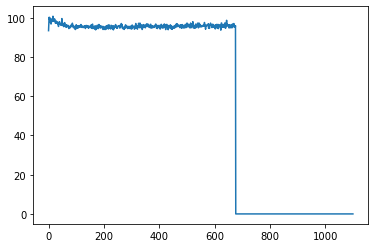

In [10]:
plt.plot(times_MYULA)

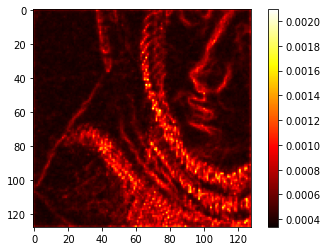

In [463]:
var = np.load('results/image_ex/denoising/MYULA/barbara/reg_par_30_data_par_399.99999999999994_ld_0.0001_tau_1e-05_iter_1100000_variance.npy')
rec = np.load('results/image_ex/denoising/MYULA/barbara/reg_par_30_data_par_399.99999999999994_ld_0.0001_tau_1e-05_iter_1100000_mmse.npy')
plt.imshow(var,cmap='hot')#,vmin=0.00025,vmax=0.004)
plt.colorbar()

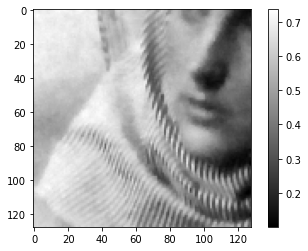

In [464]:
plt.imshow(rec,cmap='gray')#,vmin=0.00025,vmax=0.004)
plt.colorbar()

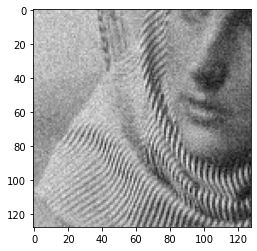

In [239]:
plt.imshow(x0,cmap='gray')
plt.show()

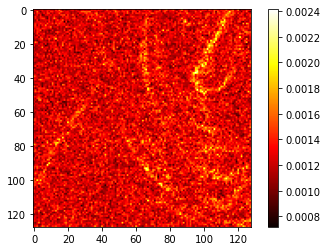

In [224]:
rec = np.load('results/image_ex/denoising/MYULA/barbara/reg_par_30_data_par_399.99999999999994_tau_1e-05_iter_1011500_mmse.npy')
var = np.load('results/image_ex/denoising/MYULA/barbara/reg_par_30_data_par_399.99999999999994_tau_1e-05_iter_1014000_variance.npy')
x0 = np.load('results/image_ex/denoising/MYULA/barbara/reg_par_30_data_par_399.99999999999994_tau_1e-05_x0.npy')
#var = np.load('results/image_ex/grad_subgrad/metro/reg_par_15_data_par_399.99999999999994_tau_1e-05_iter_680000_variance.npy')
plt.imshow(var,cmap='hot')#,vmin=0.00075,vmax=0.004)
plt.colorbar()

In [183]:
var = np.load('results/image_ex/denoising/grad_subgrad/barbara/reg_par_30_data_par_399.99999999999994_tau_1e-05_iter_1011000_variance.npy')
rec2 = np.load('results/image_ex/denoising/grad_subgrad/barbara/reg_par_30_data_par_399.99999999999994_tau_1e-05_iter_1100000_mmse.npy')

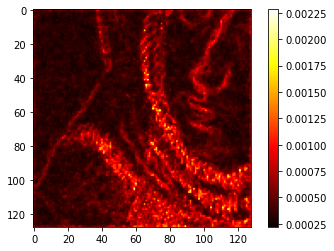

In [184]:
plt.imshow(var,cmap='hot')
plt.colorbar()

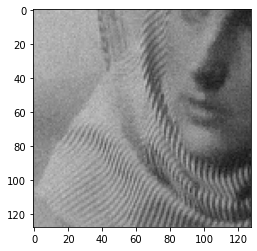

In [174]:
plt.imshow(rec,cmap='gray',vmin=0,vmax=1)

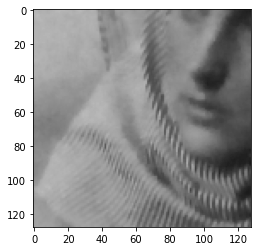

In [178]:
plt.imshow(rec2,cmap='gray',vmin=0,vmax=1)

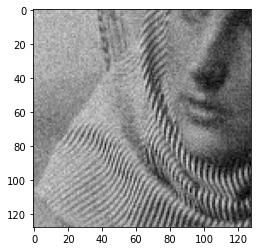

In [176]:
plt.imshow(x0,cmap='gray',vmin=0,vmax=1)

In [93]:
var.max()

0.0028614682690644155

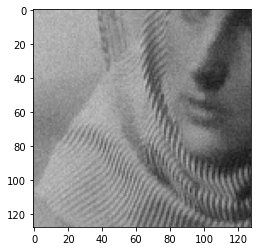

In [32]:
plt.imshow(gt,cmap='gray',vmin=0,vmax=1)

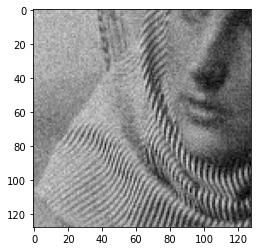

In [33]:
plt.imshow(x0,cmap='gray',vmin=0,vmax=1)

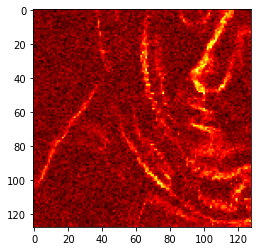

In [34]:
plt.imshow(var,cmap='hot')

In [93]:
step = 10000
burnin = 100000
max_it = 150000
num = int((max_it-burnin)//step)+1
error = np.zeros(num)
for i in range(num):
    gt_it = np.load('results/image_ex/grad_subgrad/reg_par_15_data_par_399.99999999999994_tau_1e-05_iter_'+str(i*step+burnin)+'_mmse.npy')
    error[i] = np.sum((gt_it-gt)**2)

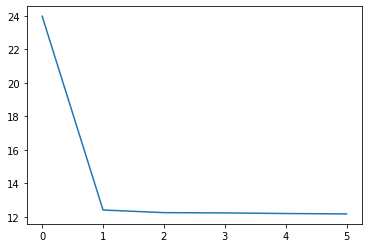

In [94]:
plt.plot((error))

In [88]:
sigma = 0.05
d= 100**2
tau=1e-5
data_par = 1/(sigma**2)
reg_par = 15
m = 1/(sigma**2)
L_F = 1/(sigma**2)
L_G = reg_par*np.sqrt(d)
K_nrm = np.sqrt(8)

In [82]:
(2*L_F*d+L_G**2*K_nrm**2)*(tau/m)

0.6500000000000002